# **NetwrokX**

[Документация](https://networkx.org/)

### **Что это такое?**

Это — библиотека Python для создания, изучения и манипуляции графами и иными сетевыми структурами.

К её основным возможностям относятся:

*   позволяет использовать разнообразные виды данных для представления вершин графов, такие как тексты, изображения, электронные таблицы, временные ряды и др.
*   получение таких характеристик графов, как высота, степени вершин, длины путей, диаметр, радиус, показатель центральности и т.д.
*   визуализация сетевых структур в виде двух-, трехмерных графиков
*   преобразование графов в распространенные форматы для их сохранения, передачи или загрузки, и другие функции.



Библиотека NetworkX способна свободно оперировать крупными сетевыми системами, содержащими до 10 миллионов вершин и 100 миллионов ребер между ними. Это особенно полезно при работе с большими данными — например:
* Финансовые сети: Анализ финансовых транзакций и связей между компаниями для выявления зависимостей и рисков.
* Дорожные сети: Моделирование и анализ дорожных сетей для оптимизации транспортного движения, предсказания потока трафика и планирования инфраструктуры.
* Социальные графы: Анализ социальных сетей для исследования взаимодействий, поиска влиятельных личностей, анализа сообществ и т.д.(В конце рассмотрим на примере Facebook)

In [ ]:
%pip install networkx

In [2]:
import networkx as nx

## **Начнём с основ:**

### **Типы графов**


Библиотека позволяет исследовать или начертить базовые [типы](https://networkx.org/documentation/stable/reference/classes/index.html) графов:

*   Graph() - неориентированный простой граф (позволяет наличие петель)
*   DiGraph() - ориентированный аналог *Graph*
*   MultiGraph() - неориентированный граф (позволяет наличие нескольких рёбер между любой парой вершин)
*   MultiDiGraph() - ориентированный аналог *MultiGraph*

In [3]:
G = nx.Graph()
D = nx.DiGraph()
M = nx.MultiGraph()
H = nx.MultiDiGraph()

В библиотеке NetworkX также есть множество встроенных [функций-генераторов](https://networkx.org/documentation/stable/reference/generators.html) других популярных типов графов - например:

*   balanced_tree(r, h) - сбалансированное дерево с *r* детьми на каждом уровне и высотой *h*
*   complete_graph(n) - полный граф с *n* вершинами
*   binomial_tree(n) - биномиальное дерево порядка *n*
*   star_graph(n) -  звездообразный граф с *n + 1* вершинами (одной центральной, соединенной со всеми остальными)
*   cycle_graph() - замкнутый цикл, образуещее круг.
*   cubical_graph() - граф, представляющий трёхмерный куб
*   house_graph() - граф, форма которого напоминает дом
*   sudoku_graph() - граф, который моделирует ограничения головоломки судоку


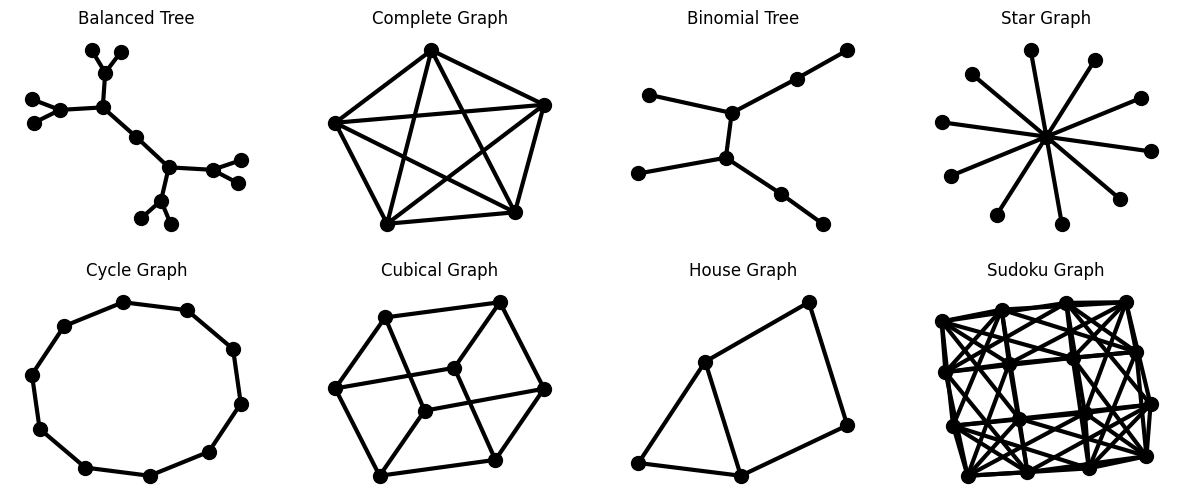

In [25]:
import matplotlib.pyplot as plt

graph_generators = {
    "Balanced Tree": nx.balanced_tree(2, 3),
    "Complete Graph": nx.complete_graph(5),
    "Binomial Tree": nx.binomial_tree(3),
    "Star Graph": nx.star_graph(10),
    "Cycle Graph": nx.cycle_graph(10),
    "Cubical Graph": nx.cubical_graph(),
    "House Graph": nx.house_graph(),
    "Sudoku Graph": nx.sudoku_graph(2)
}

# про это позже
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

# Визуализация графов
plt.figure(figsize=(15, 6))
for i, (name, G) in enumerate(graph_generators.items(), 1):
    plt.subplot(2, 4, i)
    nx.draw(G, **options)
    plt.title(name)

plt.show()

### **Вершины**

Существует две основные функции для добавления вершин: *add_node()* и *add_nodes_from()*. Первая принимает отдельные значения, а вторая принимает любой итерируемый объект (список, множество, итератор, генератор). Вершины могут быть любого неизменяемого типа: *числа(целые, вещественные, комплексные), строки, байты, кортежи*. Вершины в одном графе не обязательно должны быть одного типа.

In [5]:
G = nx.Graph()

G.add_node(1)  # добавить одну вершину
G.add_nodes_from([2 ,3])  # добавить список вершин
G.add_node("spam")  # добавить вершину "spam"
G.add_nodes_from("spam")  # добавить 4 вершины: 's', 'p', 'a', 'm'

import math
G.add_node(math.cos)

print(G.nodes())

[1, 2, 3, 'spam', 's', 'p', 'a', 'm', <built-in function cos>]


In [6]:
G2 = nx.path_graph(5)  # граф-путь из 5 вершин
print(G2.nodes())
G.add_nodes_from(G2)  # добавить вершины одного графа в другой
print(G.nodes())

[0, 1, 2, 3, 4]
[1, 2, 3, 'spam', 's', 'p', 'a', 'm', <built-in function cos>, 0, 4]


In [7]:
G.remove_node(1) # удалить вершину
G.remove_nodes_from([2, 3, math.cos]) # удалить вершины из списка
print(G.nodes())

['spam', 's', 'p', 'a', 'm', 0, 4]


Мы также можем проверить, существует ли у графа вершина, используя несколько различных методов. Самый простой - ключевое слово **in** в Python, но также есть функция **has_node**.

In [8]:
print(4 in G)
print(100 in G)

print(G.has_node(4))
print(G.has_node(100))

True
False
True
False


### **Рёбра**

Добавление рёбер происходит аналогично добавлению вершин. Рёбра могут быть добавлены с использованием функции *add_edge()* или *add_edges_from()*. Если добавить ребро, включающее вершину, которой не существует, она будет создана автоматически.

In [9]:
G = nx.Graph()

G.add_edge(1, 2)  # добавить ребро, заметим, что граф изначально пуст

e = (2, 3)
G.add_edge(*e)  # можно ещё так

G.add_edges_from([(1, 2), (1, 3)])  # или так
print(G.edges())  # так как граф - простой, ребро (1,2) не добавится ещё раз

G.remove_edge(1,2)  # удалить ребро
print(G.edges())

print(G.has_edge(3,2)) # проверить, существует ли ребро

[(1, 2), (1, 3), (2, 3)]
[(1, 3), (2, 3)]
True


### **Атрибуты**

Одной из ключевых особенностей NetworkX является возможность назначения атрибутов элементам графа.Каждый граф, вершина и ребро могут содержать пары ключ/значение атрибутов в соответствующем словаре атрибутов. По умолчанию они пусты, но атрибуты могут быть добавлены или изменены с использованием методов add_edge, add_node или путём прямого индексирования.

Атрибуты графа могут включать информацию, относящуюся ко всему графу, например, дату создания, автора, описание.

In [10]:
G = nx.Graph(date_created='20-12-2012',name="Rainbow")
G.graph

{'date_created': '20-12-2012', 'name': 'Rainbow'}

Это обычный словарь, поэтому можно делать так:

In [11]:
G.graph['is_connected'] = False
del G.graph['name']
G.graph

{'date_created': '20-12-2012', 'is_connected': False}

То же самое с атрибутами вершин и рёбер

In [12]:
G.add_node(1, color='red', size=10) # вес, метку, цвет и др.
print(G.nodes[1])
G.nodes[1]['alpha'] = 1
print(G.nodes[1])

G.add_edge(1, 2, weight=5) # вес, тип связи, направление (в направленных графах) и др.
print(G[1][2])
del G[1][2]['weight']
print(G[1][2])

{'color': 'red', 'size': 10}
{'color': 'red', 'size': 10, 'alpha': 1}
{'weight': 5}
{}


### **Полезные функции**

NetworkX имеет встроенные [функции](https://networkx.org/documentation/stable/reference/functions.html) и [алгоритмы](https://networkx.org/documentation/stable/reference/algorithms/index.html) , позволяющие выполнять сетевой анализ, такие как



*   nx.shortest_path() - возвращает кратчайший путь между двумя вершинами в простом или взвешенном графе (по умолчанию использует алгоритм Дейкстры)
* nx.degree() -  возвращает словарь, где ключи - вершины графа, а значения - их степени
*   nx.diameter() - возвращает диаметр графа
*   nx.connected_components() - возвращает генератор множеств вершин для каждой компоненты связности в графе
*   nx.is_connected() - проверяет, является ли граф связным

In [13]:
G = nx.Graph()
G.add_edge(1, 2, weight=0.1)
G.add_edge(2, 3, weight=2)
G.add_edge(1, 3, weight=1.0)
G.add_edge(3, 4, weight=2.5)

print("Минимальный кратчайший путь:", nx.shortest_path(G, 2, 4, weight='weight'))
print("Степени вершин:", nx.degree(G))
print("Диаметр графа:", nx.diameter(G))
print("Компоненты связности:", list(nx.connected_components(G)))
print("Граф связный:", nx.is_connected(G))

Минимальный кратчайший путь: [2, 1, 3, 4]
Степени вершин: [(1, 2), (2, 2), (3, 3), (4, 1)]
Диаметр графа: 2
Компоненты связности: [{1, 2, 3, 4}]
Граф связный: True


### **Визуализация**

NetworkX в основном используется для статической визуализации.

Визуализировать граф можно используя метод draw():

In [14]:
import matplotlib.pyplot as plt

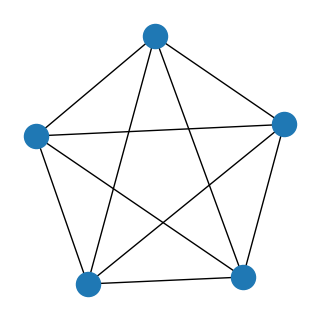

In [15]:
plt.figure(figsize=(3, 3))
G = nx.complete_graph(5) # полный граф
nx.draw(G)

Но можно и лучше!

*   with_labels (bool) - показывать названия вершин
*   node_color (цвет) - цвет вершин
*   node_size (число) - размер вершин (по умолчанию 300)
*   alpha (число) - прозрачность вершин в диапозоне от 0 до 1 (по умолчанию 1)
*   font_weight (строка) - дополнительное форматирование текста названий вершин.

[см. nx.draw()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html)

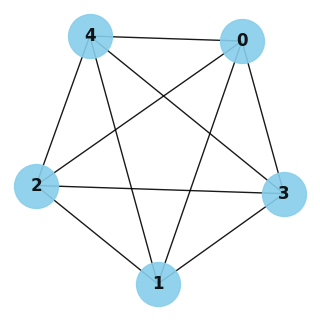

In [16]:
plt.figure(figsize=(3, 3))

options = {
    'with_labels': True,
    'node_color': 'skyblue',
    'node_size': 1000,
    'alpha': 0.9,
    'font_weight': 'bold',
}

G = nx.complete_graph(5)
nx.draw(G, **options)

**Параметр pos**

*pos* -  это параметр функции *nx.draw()*, который определяет расположение вершин. Можно использовать различные функции расположения, такие как :
, nx.circular_layout, nx.random_layout и

*   nx.spiral_layout() - располагает вершины графа в виде спирали.

*   nx.shell_layout() - располагает вершины в одном или нескольких концентрических кругах (оболочках), что полезно для визуализации иерархических или многоуровневых структур.

*   nx.random_layout() - вершины располагаются случайным образом на плоскости.

[и др](https://networkx.org/documentation/stable/reference/drawing.html)

Примеры использования некоторых

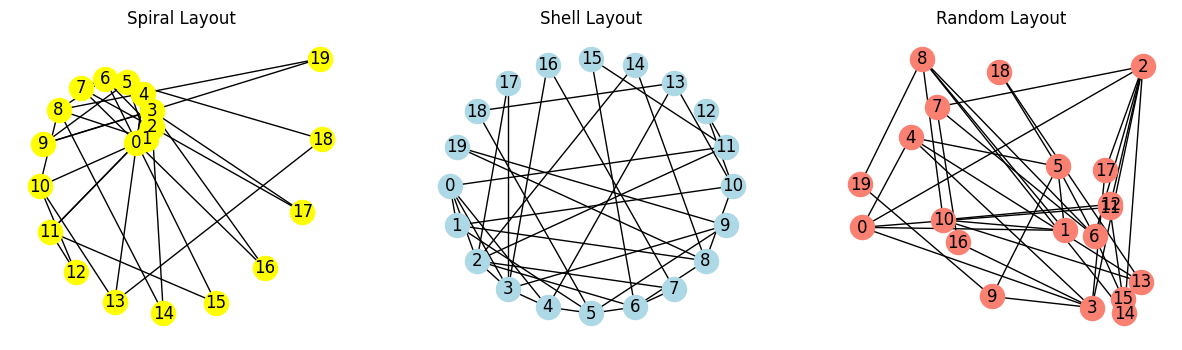

In [17]:
G = nx.barabasi_albert_graph(20, 2)

plt.figure(figsize=(15, 4))

# Spiral Layout
plt.subplot(131)
pos_spring = nx.spiral_layout(G)
nx.draw(G, pos_spring, with_labels=True, node_color='yellow')
plt.title("Spiral Layout")

# Shell Layout
plt.subplot(132)
pos_shell = nx.shell_layout(G)
nx.draw(G, pos_shell, with_labels=True, node_color='lightblue')
plt.title("Shell Layout")

# Random Layout
plt.subplot(133)
pos_random = nx.random_layout(G)
nx.draw(G, pos_random, with_labels=True, node_color='salmon')
plt.title("Random Layout")

plt.show()

### **Операции с графами**

Библиотека NetworkX включает ряд операций c графами:


*   subgraph(G, nbunch) - возвращает подграф с вершинами из nbunch
*   union(G, H, rename=bool) - объединяет два графа
*   compose(G, H) - объединяет два графа в один
*   cartesian_product_graph(G, H) - возвращает декартово произведение графов
*   complement(G) - возвращает дополнение графа
*   undirected_graph(G) и to_directed(G) - возвращает неориентированный и ориентированный графы соответственно

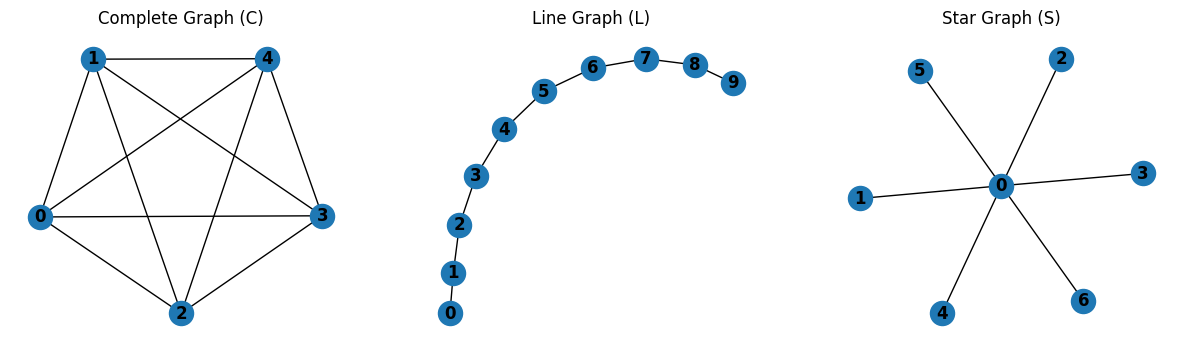

In [48]:
# Создаем полный граф C из пяти вершин
C = nx.complete_graph(5)

# Создаем граф L - линейный граф с 10 вершинами
L = nx.path_graph(10)

# Создаем звездный граф S с 7 вершинами, где 0 - центр
S = nx.star_graph(6)

# Визуализация созданных графов
plt.figure(figsize=(15, 4))

plt.subplot(131)
nx.draw(C, with_labels=True, font_weight='bold')
plt.title("Complete Graph (C)")

plt.subplot(132)
nx.draw(L, with_labels=True, font_weight='bold')
plt.title("Line Graph (L)")

plt.subplot(133)
nx.draw(S, with_labels=True, font_weight='bold')
plt.title("Star Graph (S)")

plt.show()

Примеры использования некоторых

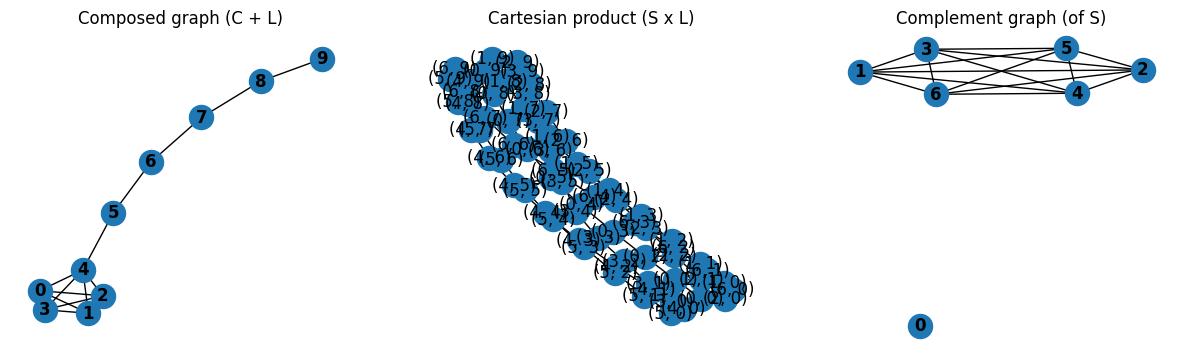

In [52]:
composed_graph = nx.compose(C, L)
cartesian_product_graph = nx.cartesian_product(S, L)
complement_graph = nx.complement(S)

plt.figure(figsize=(15, 4))

plt.subplot(131)
nx.draw(composed_graph, with_labels=True, font_weight='bold')
plt.title("Composed graph (C + L)")

plt.subplot(132)
nx.draw(cartesian_product_graph, with_labels=True)
plt.title("Cartesian product (S x L)")

plt.subplot(133)
nx.draw(complement_graph, with_labels=True, font_weight='bold')
plt.title("Complement graph (of S)")

plt.show()

### **Выгрузка**


Ну всё, потрудились, можно и результаты сохранить:

*   nx.write_adjlist(G, path) - записывает граф в виде списка смежности. Каждая строка файла представляет вершину и далее её соседей, что делает его простым и легко читаемым для человека, но менее структурированным для машинного анализа

*   nx.write_edgelist(G, path) - сохраняет граф в виде списка смежности. Каждая строка файла представляет ребро(две вершины) и его атрибуты

*   nx.write_gml(G, path) - GML(Graph Modelling Language) использует простой текстовый формат с удобным для чтения синтаксисом. Он основан на описании вершин, ребер и атрибутов в виде текстовых строк.

*   nx.write_gexf(G, path) - GEXF(Graph Exchange XML Format) использует XML-формат, что делает его более структурированным и удобным для машинного анализа. Он представляет граф в виде древовидной структуры XML.

Есть ещё и [другие](https://networkx.org/documentation/stable/reference/readwrite/index.html), менее популярные форматы.

## **Пример с Facebook**

Загрузим датасет, который представляет собой "круги" (или "списки друзей") из социальной сети Facebook.

In [20]:
import pandas as pd

df = pd.read_csv("/content/facebook_combined.txt", sep=" ", header=None) # https://snap.stanford.edu/data/ego-Facebook.html
df.columns = ["person1_id", "person2_id"]
sample = df.sample(1000, random_state=1) # возьмём 1000, тк датасет огромный

sample.head(5)

,person1_id,person2_id
74346,2839,3064
62630,2309,2590
199,0,200
51398,2088,2468
27375,1319,1568


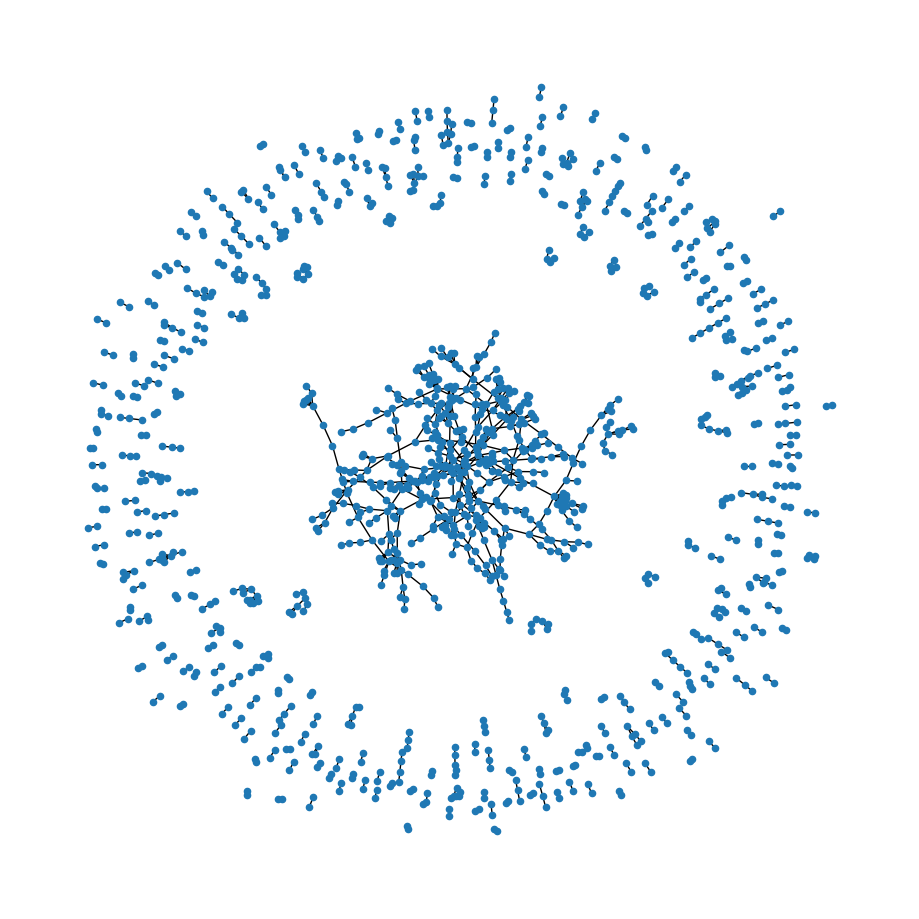

In [54]:
plt.figure(figsize=(9, 9))

G = nx.from_pandas_edgelist(sample, "person1_id", "person2_id")

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=20)

plt.show()

Эта визуализация представляет собой граф "дружбы" в социальной сети Facebook между некоторыми пользователями. Каждая вершины в графе представляет отдельного человека, а рёбра между вершинами представляют собой связи дружбы между ними. Таким образом, можно увидеть, как пользователи связаны между собой через "дружеские связи". Анализ свойств такого графа может привести к различным выводам о структуре и характере социальной сети.

Например, распределение степеней вершин в графе, указывает на количество связей, которые эта вершина имеет. В контексте социальной сети, такое распределение может интерпретироваться как распределение числа друзей у пользователей.

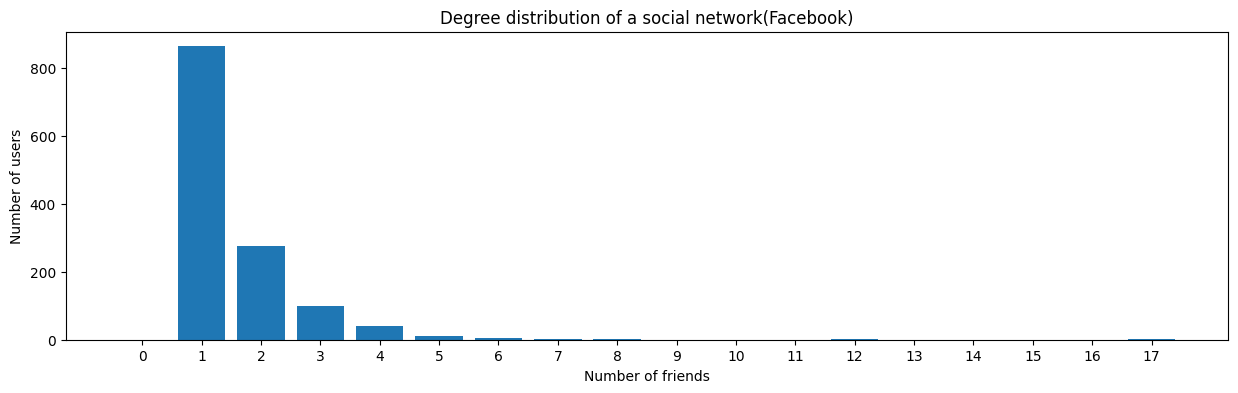

In [56]:
degree_dist = nx.degree_histogram(G)

plt.figure(figsize=(15, 4))

plt.bar(range(len(degree_dist)), degree_dist)
plt.xticks(range(len(degree_dist)))
plt.title('Degree distribution of a social network(Facebook)')
plt.ylabel("Number of users")
plt.xlabel("Number of friends")

plt.show()